/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:86: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


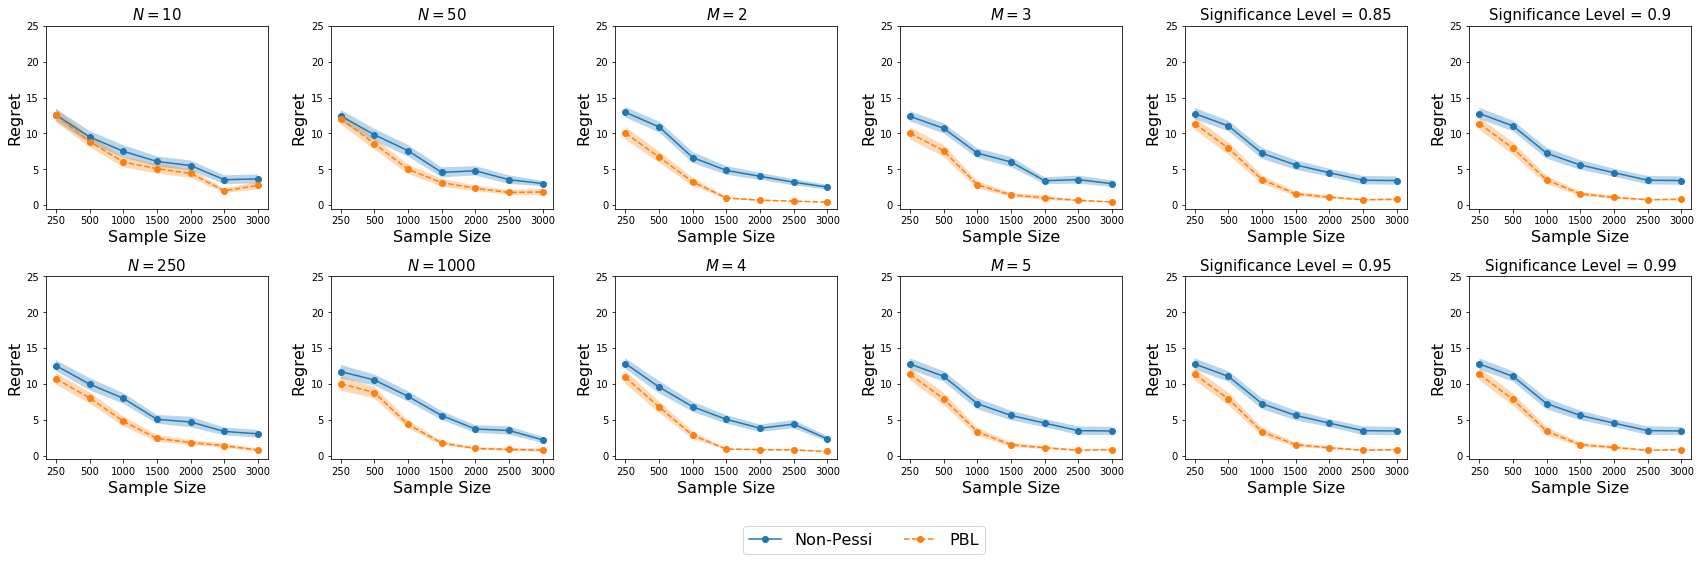

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

def sub_plot(ax1,file,bound=False): 
    info_ls = np.load(file,allow_pickle=True)
    y1 = [np.mean(t[0]) for t in info_ls]
    y2 = [np.mean(t[1]) for t in info_ls]
    y4 = [np.mean(t[3]) for t in info_ls]

    y1_lower = [np.mean(t[0]) - np.std(t[0])/np.sqrt(len(t[0])) for t in info_ls]
    y1_upper = [np.mean(t[0]) + np.std(t[0])/np.sqrt(len(t[0])) for t in info_ls]
    y4_lower = [np.mean(t[3]) - np.std(t[3])/np.sqrt(len(t[3])) for t in info_ls]
    y4_upper = [np.mean(t[3]) + np.std(t[3])/np.sqrt(len(t[3])) for t in info_ls]
    
    l1 = ax1.plot(x[0:len(y1)], y1,linestyle='-', marker="o", label='Non-Pessi')
    ax1.fill_between(x[0:len(y1)], y1_lower, y1_upper, alpha=.3)
    l4 = ax1.plot(x[0:len(y4)], y4,linestyle='--', marker="o", label='PBL')
    ax1.fill_between(x[0:len(y4)], y4_lower, y4_upper, alpha=.3)
    
    line_labels = ["Non-Pessi", "PBL"]

    l=[l1,l4]
    
    ax1.set_xlabel('Sample Size', fontsize=16)
    ax1.set_ylabel('Regret', fontsize=16)
    
    return l, line_labels

# one stage (linear)
c_ls = [0,0.01,0.1,0.5,1,2,5,10]   
fig,ax=plt.subplots(nrows=2,ncols=6,figsize=(24,8))
x = np.array(["250","500","1000","1500","2000","2500","3000"])


l, line_labels = sub_plot(ax[0,0],"info_ls_bnn_linear_stage1_N_10_b_size_100_n_sample_5_alpha_0.95_0.95.npy",True)
sub_plot(ax[0,1],"info_ls_bnn_linear_stage1_N_50_b_size_100_n_sample_5_alpha_0.95_0.95.npy")
sub_plot(ax[1,0],"info_ls_bnn_linear_stage1_N_250_b_size_100_n_sample_5_alpha_0.95_0.95.npy")
sub_plot(ax[1,1],"info_ls_bnn_linear_stage1_N1000_0.95.npy")

sub_plot(ax[0,2],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_2_alpha_0.95_0.95.npy")
sub_plot(ax[0,3],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_3_alpha_0.95_0.95.npy")
sub_plot(ax[1,2],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_4_alpha_0.95_0.95.npy")
sub_plot(ax[1,3],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_5_alpha_0.95_0.95.npy")

sub_plot(ax[0,4],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_5_alpha_0.85_0.95.npy")
sub_plot(ax[0,5],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_5_alpha_0.9_0.95.npy")
sub_plot(ax[1,4],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_5_alpha_0.95_0.95.npy")
sub_plot(ax[1,5],"info_ls_bnn_linear_stage1_N_10000_b_size_100_n_sample_5_alpha_0.99_0.95.npy")

ax[0,0].set_title(r"$N = 10$", fontsize=15)
ax[0,1].set_title(r"$N = 50$", fontsize=15)
ax[1,0].set_title(r"$N = 250$", fontsize=15)
ax[1,1].set_title(r"$N = 1000$", fontsize=15)

ax[0,2].set_title(r"$M = 2$", fontsize=15)
ax[0,3].set_title(r"$M = 3$", fontsize=15)
ax[1,2].set_title(r"$M = 4$", fontsize=15)
ax[1,3].set_title(r"$M = 5$", fontsize=15)

ax[0,4].set_title(r"Significance Level = 0.85", fontsize=15)
ax[0,5].set_title(r"Significance Level = 0.9", fontsize=15)
ax[1,4].set_title(r"Significance Level = 0.95", fontsize=15)
ax[1,5].set_title(r"Significance Level = 0.99", fontsize=15)


ax[0,0].set_ylim([-0.5,25])
ax[0,1].set_ylim([-0.5,25])
ax[0,2].set_ylim([-0.5,25])
ax[0,3].set_ylim([-0.5,25])
ax[0,4].set_ylim([-0.5,25])
ax[0,5].set_ylim([-0.5,25])

ax[1,0].set_ylim([-0.5,25])
ax[1,1].set_ylim([-0.5,25])
ax[1,2].set_ylim([-0.5,25])
ax[1,3].set_ylim([-0.5,25])
ax[1,4].set_ylim([-0.5,25])
ax[1,5].set_ylim([-0.5,25])


fig.legend(l,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.5,bbox_to_anchor=(0.5, 0), prop={'size':16},fancybox=True  # Title for the legend
           , ncol=7)

plt.tight_layout(pad=2)  
plt.subplots_adjust(bottom=0.18)
plt.show()
fig.savefig('../stage1_linear_sensitivity_new.svg', format = "svg", dpi=1000)